# Example Workbook for HDAC CBE Analysis

In [1]:
import be_scan
import warnings
warnings.filterwarnings('ignore')

In [2]:
fasta_file_dir = '../../../../../../Downloads/HDAC_Data/CBE/'

sample_sheet = '../../../tests/test_data/HDAC_data/231208_HDAC1_batch.csv'
in_ref = '../../../tests/test_data/HDAC_data/XYH_annotated_HDAC1_ABE.csv'
in_comparisons = '../../../tests/test_data/HDAC_data/comparisons.csv'

In [3]:
be_scan.analysis.count_reads(
    sample_sheet, in_ref, file_dir = fasta_file_dir, KEY_REV  = 'GTTTGAGA', 
)

../../../../../../Downloads/HDAC_Data/CBE/MY400-D0_S45_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted1_S49_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted2_S50_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted3_S51_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted1_S52_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted2_S53_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted3_S54_L001_R1_001.fastq.gz processed
Count reads completed


,Unnamed: 0,sgRNA_seq,sgRNA context sequence,Gene Symbol,Transcript reference allele.x,Transcript alternate allele.x,Genome reference allele.x,Genome alternate allele.x,Chromosome.x,sgRNA Strand.x,...,Amino_acid_edit,Mut_type,Edit_site,counts-1.csv,counts-5.csv,counts-6.csv,counts-7.csv,counts-8.csv,counts-9.csv,counts-10.csv
0,0,GACTGACGGTAGGGACGGGA,GACCGACTGACGGTAGGGACGGGAGGCGA,HDAC1,A,G,A,G,1,sense,...,NaN,Control,-1.0,153,153,128,164,210,260,207
1,1,CGCCTCCCGTCCCTACCGTC,TGCTCGCCTCCCGTCCCTACCGTCAGTCG,HDAC1,T,C,T,C,1,antisense,...,NaN,Missense,-1.0,168,103,108,138,151,193,149
2,2,CTGACGGTAGGGACGGGAGG,CCGACTGACGGTAGGGACGGGAGGCGAGC,HDAC1,A,G,A,G,1,sense,...,NaN,Control,-1.0,108,102,93,99,126,145,130
3,3,GACGGTAGGGACGGGAGGCG,GACTGACGGTAGGGACGGGAGGCGAGCAA,HDAC1,A,G,A,G,1,sense,...,NaN,Control,-1.0,167,132,120,141,135,209,174
4,4,TGCTCGCCTCCCGTCCCTAC,ATCTTGCTCGCCTCCCGTCCCTACCGTCA,HDAC1,T,C,T,C,1,antisense,...,NaN,Missense,-1.0,254,218,204,233,248,311,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1208,GCTTCCTGCTGAGTCCCTCA,TCTGGCTTCCTGCTGAGTCCCTCACGTTT,HDAC1,A,G,A,G,1,sense,...,NaN,Missense,-1.0,229,207,181,226,228,288,216
1209,1209,ACGTGAGGGACTCAGCAGGA,AGAAACGTGAGGGACTCAGCAGGAAGCCA,HDAC1,T,C,T,C,1,antisense,...,NaN,Control,-1.0,190,179,163,190,219,222,191
1210,1210,GAAACGTGAGGGACTCAGCA,GGAAGAAACGTGAGGGACTCAGCAGGAAG,HDAC1,T,C,T,C,1,antisense,...,NaN,Control,-1.0,177,120,144,145,138,151,140
1211,1211,AGAAACGTGAGGGACTCAGC,GGGAAGAAACGTGAGGGACTCAGCAGGAA,HDAC1,T,C,T,C,1,antisense,...,NaN,Control,-1.0,214,176,181,211,219,283,177


In [4]:
be_scan.analysis.merge_and_norm(
    sample_sheet, in_ref=fasta_file_dir+'counts_library.csv', file_dir = fasta_file_dir, 
)

Merge and normalize completed


,Unnamed: 0,sgRNA_seq,sgRNA context sequence,Gene Symbol,Transcript reference allele.x,Transcript alternate allele.x,Genome reference allele.x,Genome alternate allele.x,Chromosome.x,sgRNA Strand.x,...,unsorted-3_t0,sorted-1,sorted-1_log2,sorted-1_t0,sorted-2,sorted-2_log2,sorted-2_t0,sorted-3,sorted-3_log2,sorted-3_t0
0,0,GACTGACGGTAGGGACGGGA,GACCGACTGACGGTAGGGACGGGAGGCGA,HDAC1,A,G,A,G,1,sense,...,0.219134,210,9.826863,0.435108,260,9.878294,0.486540,207,9.868169,0.476414
1,1,CGCCTCCCGTCCCTACCGTC,TGCTCGCCTCCCGTCCCTACCGTCAGTCG,HDAC1,T,C,T,C,1,antisense,...,-0.164283,151,9.351643,-0.174850,193,9.448916,-0.077577,149,9.394451,-0.132041
2,2,CTGACGGTAGGGACGGGAGG,CCGACTGACGGTAGGGACGGGAGGCGAGC,HDAC1,A,G,A,G,1,sense,...,-0.006244,126,9.090956,0.200807,145,9.037051,0.146902,130,9.197964,0.307815
3,3,GACGGTAGGGACGGGAGGCG,GACTGACGGTAGGGACGGGAGGCGAGCAA,HDAC1,A,G,A,G,1,sense,...,-0.124702,135,9.190315,-0.327576,209,9.563660,0.045769,174,9.617918,0.100027
4,4,TGCTCGCCTCCCGTCCCTAC,ATCTTGCTCGCCTCCCGTCCCTACCGTCA,HDAC1,T,C,T,C,1,antisense,...,-0.005221,248,10.066570,-0.055627,311,10.136446,0.014249,241,10.087353,-0.034844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1208,GCTTCCTGCTGAGTCCCTCA,TCTGGCTTCCTGCTGAGTCCCTCACGTTT,HDAC1,A,G,A,G,1,sense,...,0.100152,228,9.945382,-0.027475,288,10.025703,0.052845,216,9.929505,-0.043353
1209,1209,ACGTGAGGGACTCAGCAGGA,AGAAACGTGAGGGACTCAGCAGGAAGCCA,HDAC1,T,C,T,C,1,antisense,...,0.119136,219,9.887339,0.183535,222,9.650605,-0.053199,191,9.752240,0.048436
1210,1210,GAAACGTGAGGGACTCAGCA,GGAAGAAACGTGAGGGACTCAGCAGGAAG,HDAC1,T,C,T,C,1,antisense,...,-0.168193,138,9.221970,-0.379710,151,9.095438,-0.506243,140,9.304703,-0.296978
1211,1211,AGAAACGTGAGGGACTCAGC,GGGAAGAAACGTGAGGGACTCAGCAGGAA,HDAC1,T,C,T,C,1,antisense,...,0.098804,219,9.887339,0.012118,283,10.000460,0.125239,177,9.642549,-0.232673


In [5]:
be_scan.analysis.average_reps(
    sample_sheet, in_lfc=fasta_file_dir+'agg_log2_t0.csv', file_dir = fasta_file_dir, 
)

Average reps completed


In [6]:
be_scan.analysis.compare_conds(
    in_comparisons=in_comparisons, file_dir = fasta_file_dir, in_conds=fasta_file_dir+'agg_t0_conds.csv'
)

Compare conditions completed


In [7]:
be_scan.analysis.batch_process(
    sample_sheet,
    in_ref,
    in_comparisons,
    file_dir = fasta_file_dir,
    KEY_REV  = 'GTTTGAGA', 
)

../../../../../../Downloads/HDAC_Data/CBE/MY400-D0_S45_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted1_S49_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted2_S50_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted3_S51_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted1_S52_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted2_S53_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted3_S54_L001_R1_001.fastq.gz processed
Count reads completed
Merge and normalize completed
Average reps completed
Compare conditions completed


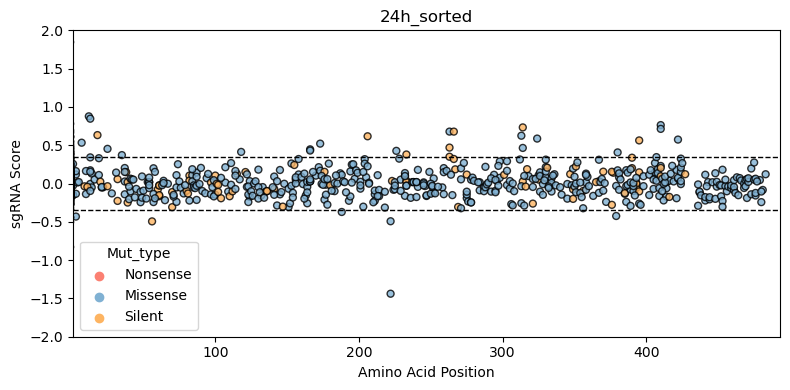

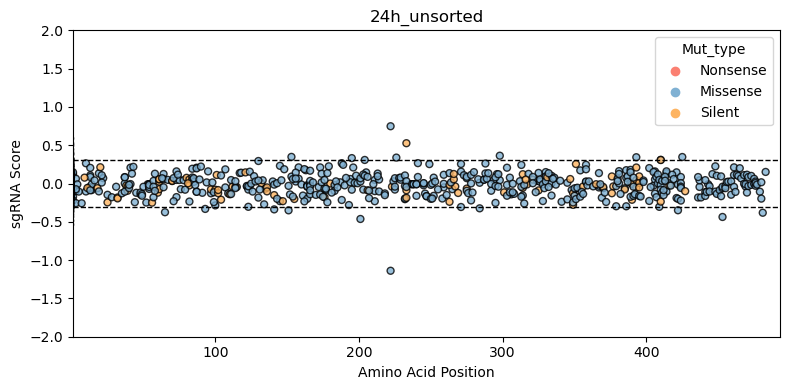

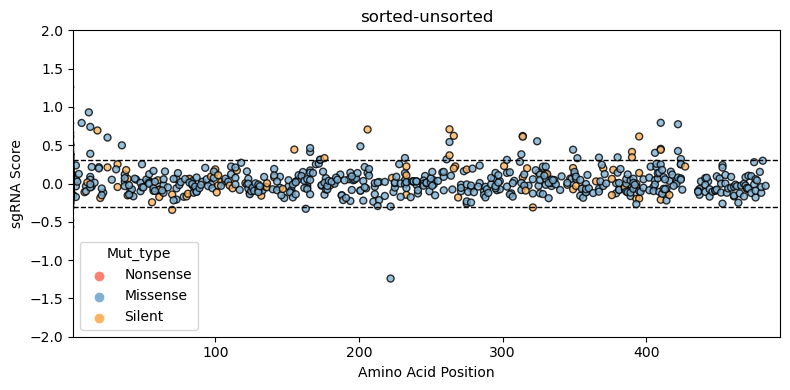

In [8]:
be_scan.plot.plot_scatterplot(df_filepath       = fasta_file_dir + "agg_comps.csv", 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['24h_sorted', "24h_unsorted", 'sorted-unsorted'], 
                              neg_ctrl_col      = 'Mut_type', 
                              neg_ctrl_category = 'Control',
                              savefig           = False,
                              xmin=1
                              )